### CS156 Pre-Class Work for Session 14.1

#### Hopfield Networks


## Hopfield Networks

Implement a Hopfield Network, and perform the basic analysis below. *I am working with sample code from [here](http://codeaffectionate.blogspot.com/2013/05/fun-with-hopfield-and-numpy.html). *

1 . **Store**

Implement a python function which is able to store a memory in a Hopfield network.

2 . **Recall**

Implement a python function which runs the recall algorithm for an initial (corrupted) memory. Make sure to include a stopping criteria

3 . **Capacity**

Write a function to determine the capacity for a Hopfield network of a given size. This function should have a size parameter, and then initialize an empty Hopfield network. It must then store a random memory and test whether the network is able to recall the correct memory if given a pattern corrupted by a single bit. The function must then return the largest number of memories that were stored and successfully recalled.

4 . **Scaling behavior**

Produce a plot showing capacity as a function of network size. What is the scaling behavior?

5 . **(Optional) Asynchronous updates**

Change your implementation, so that the state is updated asynchronously. Find a state that didn’t converge in your original implementation, and show that it does converge in your new implementation.

In [0]:
import numpy as np
from pylab import imshow, cm, show
import matplotlib.pyplot as plt

"""
Adapted from: http://codeaffectionate.blogspot.com/2013/05/fun-with-hopfield-and-numpy.html
"""

### The Data
Here are the original patterns that we want the Hopfield to remember. We convert them to a binary pattern of -1 and 1s.

In [0]:
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""
 
Z = """
XXXXX
...X.
..X..
.X...
XXXXX
"""

In [0]:
def to_pattern(letter):
    return np.array([+1 if c=='X' else -1 for c in letter.replace('\n','')])

In [0]:
def display_img(pattern):
    imshow(pattern.reshape((5,5)), cmap=cm.binary, interpolation='nearest')
    show()

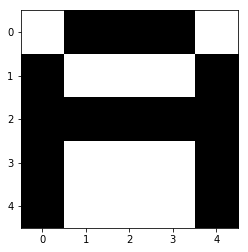

In [0]:
A_pattern = to_pattern(A)
display_img(A_pattern)

### Training the network/storage
To train a Hopfield network we compute of the outer products of all pattern vectors with each others and sum over the resulting matrix. This gives us the weights of the edges between the nodes (which are the pixels of the image).

In [0]:
patterns = np.array([to_pattern(A), to_pattern(Z)])

In [0]:
def training(patterns):
    row, col = patterns.shape    #shape of the network
    W = np.zeros((col, col))     #weight matrix
    
    for p in patterns:
        W = W + np.outer(p,p)
        
    W[np.diag_indices(col)] = 0  #setting the diagonals equal to 0
    return W/row

In [0]:
weights = training(patterns)

### Recall
To recall a stored pattern from a Hopfield network the dot product of the pattern vector and the weight matrix is computed. We repeat this until the pattern vector is stable (so we need a stopping condition!).

In [0]:
def recall(W, pattern, steps=5, verbose=False):
    sgn = np.vectorize(lambda x: -1 if x<0 else +1)
    
    for i in xrange(steps):                  #default stopping condition  
        pattern = sgn(np.dot(pattern,W))     #is 5 iterations
        if verbose == True:
            print "After iteration %d:" %i
            display_img(pattern)
        
    return pattern

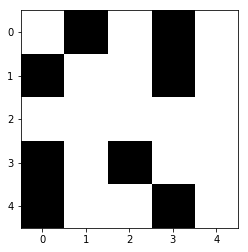

In [0]:
Z_modified = """
.X.X.
X..X.
.....
X.X..
X..X.
"""
display_img(to_pattern(Z_modified))

After iteration 0:


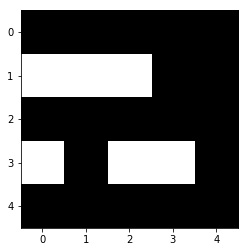

After iteration 1:


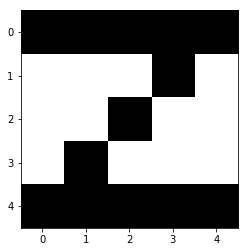

In [0]:
corrected_pattern = recall(weights, to_pattern(Z_modified), 2, True)

### Capacity
Write a function to determine the capacity for a Hopfield network of a given size. This function should have a size parameter, and then initialize an empty Hopfield network. It must then store a random memory and test whether the network is able to recall the correct memory if given a pattern corrupted by a single bit. The function must then return the largest number of memories that were stored and successfully recalled.

In [0]:
def capacity(size):
    """
    Generates corrupted patterns, trains on the patterns and
    then tests if the network was able to correctly recall the
    corrupted pattern.
    """
    num = 1                   
    
    while True:
        patterns = generate_patterns(num, size)
        patterns = np.reshape(patterns, (num,size))

        corrupt_patterns = [p for p in corrupt(patterns)]
        corrupt_patterns = np.reshape(corrupt_patterns, (num,size))
        
        weights = training(patterns)
        recalled_patterns = recall(weights, corrupt_patterns)

        if np.any(np.not_equal(recalled_patterns,patterns)):
            break
        else:
            num +=1 
        
    return num

def generate_patterns(num, size):
    #generate an array with num random patterns of length row*col
    patterns = []
    for _ in range(num):
        patterns.append(np.random.choice((-1,1),size=size))
    return patterns
    
def corrupt(pattern):
    #corrupt a single input pattern by 1 element 
    i = np.random.randint((np.shape(pattern)[1]))
    pattern[0][i] = -pattern[0][i]
    return (pattern)

### Scaling behavior
Testing the capacity of different sizes of Hopnetworks. Averaging over the results of several trials to smoothen out the pattern.

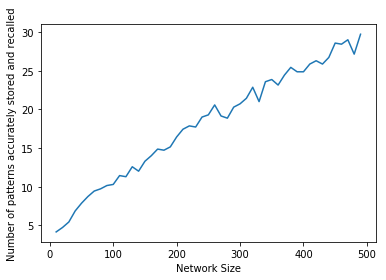

In [0]:
patterns_stored = []
netw_size = [x for x in range(10,500,10)]

for size in netw_size:
    cap = []
    for i in range(7):
        cap.append(capacity(size))
    mean_cap = np.average(cap)
    patterns_stored.append(mean_cap)

plt.plot(netw_size, patterns_stored)
plt.xlabel("Network Size")
plt.ylabel("Number of patterns accurately stored and recalled")
plt.show()